In [0]:
!pip install -q kaggle

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets list

ref                                                          title                                                size  lastUpdated          downloadCount  
-----------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
ronitf/heart-disease-uci                                     Heart Disease UCI                                     3KB  2018-06-25 11:33:56           7330  
jessicali9530/stanford-dogs-dataset                          Stanford Dogs Dataset                               735MB  2019-02-13 05:45:25            344  
karangadiya/fifa19                                           FIFA 19 complete player dataset                       2MB  2018-12-21 03:52:59           8672  
russellyates88/suicide-rates-overview-1985-to-2016           Suicide Rates Overview 1985 to 2016                 396KB  2018-12-01 19:18:25           5428  
iarunava/cell-images-for-detecting-malaria                

In [4]:
!kaggle datasets download -d ard6476/trainingandtestingdatasetwithcsvs

100% 5.08G/5.09G [00:45<00:00, 114MB/s] 
100% 5.09G/5.09G [00:45<00:00, 119MB/s]


In [0]:
import os

In [6]:
os.listdir('../content')

['.config',
 'kaggle.json',
 'trainingandtestingdatasetwithcsvs.zip',
 'sample_data']

In [0]:
!unzip -uq "../content/trainingandtestingdatasetwithcsvs.zip"

In [0]:
!unzip -uq "../content/flipkartDaretoCompete.zip"

In [0]:
!unzip -uq "../content/TestImages_Round_3.zip"

In [0]:
# from google.colab import drive
# drive.mount('../content/gdrive')
# !unzip -uq "../content/flipkartDaretoCompete.zip" -d "../content/gdrive/My Drive/Object_Tracking"
# !unzip -uq "../content/TestImages_Round_3.zip" -d "../content/gdrive/My Drive/Object_Tracking"

## Now Working on the Dataset

In [0]:
import pandas as pd
import numpy as np

In [12]:
images = os.listdir('../content/TrainImages_Round_3/')
len(images)

24000

In [13]:
df = pd.DataFrame(pd.read_csv('../content/training_set_round_3.csv'))
df.head()

,image_name,x1,x2,y1,y2
0,JPEG_20160517_140621_1000651031832.png,78,446,83,422
1,1473231510890DeeplearnS11456.png,73,567,146,351
2,1476881557883Untitled1.png,13,561,124,362
3,1474264827890cobalt-beyond-the-sea-maxi-dress3...,0,640,140,330
4,JPEG_20160711_113321_1000235741992.png,217,442,65,465


In [14]:
df.describe()

,x1,x2,y1,y2
count,24000.000000,24000.000000,24000.000000,24000.000000
mean,95.479833,543.997083,89.421792,389.878708
std,78.983754,80.296679,62.151499,62.407920
min,-1.000000,145.000000,-1.000000,80.000000
25%,29.000000,487.000000,43.000000,346.000000
50%,78.000000,560.000000,87.000000,392.000000
75%,151.000000,611.000000,134.000000,435.000000
max,524.000000,2492.000000,3955.000000,3955.000000


In [0]:
import cv2
import matplotlib.pyplot as plt

In [0]:
df1000 = df.copy()

In [0]:
df1000.insert(column='np_image',value = ([cv2.resize(cv2.imread('../content/TrainImages_Round_3/' + i,0),(80,60))
                                          for i in df1000['image_name']]), 
                                          loc = len(df1000.columns))

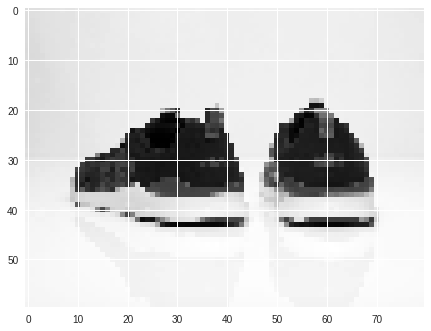

In [18]:
plt.imshow(df1000['np_image'][1],cmap='gray')
plt.show()

In [19]:
from sklearn import model_selection as ms
X = df1000.iloc[:,-1]
Y = df1000.iloc[:,1:-1]
X.head(), Y.head()

(0    [[139, 138, 139, 137, 137, 141, 141, 146, 150,...
 1    [[205, 206, 206, 208, 209, 209, 210, 212, 211,...
 2    [[145, 147, 151, 152, 152, 151, 152, 152, 152,...
 3    [[195, 191, 188, 183, 181, 174, 177, 172, 191,...
 4    [[182, 183, 183, 184, 184, 185, 184, 183, 185,...
 Name: np_image, dtype: object,     x1   x2   y1   y2
 0   78  446   83  422
 1   73  567  146  351
 2   13  561  124  362
 3    0  640  140  330
 4  217  442   65  465)

In [20]:
X_train,X_test,Y_train,Y_test = ms.train_test_split(X,Y,random_state = 10,test_size = 0.0)
x_train = np.array(X_train)
x_test = np.array(X_test)
y_train = np.array(Y_train)
y_test = np.array(Y_test)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((24000,), (0,), (24000, 4), (0, 4))

In [21]:
print(x_train.shape,x_train[0].shape,type(x_train))
x_train_for_model = np.array([x_train[i].reshape(x_train[i].shape[0],x_train[i].shape[1],1) for i in range(x_train.shape[0])])
x_test_for_model = np.array([x_test[i].reshape(x_test[i].shape[0],x_test[i].shape[1],1) for i in range(x_test.shape[0])])
x_train_for_model.shape, x_test_for_model.shape

(24000,) (60, 80) <class 'numpy.ndarray'>


((24000, 60, 80, 1), (0,))

## Now making the model for the dataset

In [22]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, BatchNormalization, LeakyReLU, MaxPool2D
from keras import losses,optimizers
from keras import backend as K

Using TensorFlow backend.


In [0]:
def tiny_yolo_v3():
    model = Sequential()
    
    # Level 1
    model.add(Conv2D(filters=16, kernel_size=3, strides=1, padding='same',use_bias=True,input_shape = (60,80,1)))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.2))
    model.add(MaxPooling2D(pool_size=2, strides = 2, padding='SAME', data_format = 'channels_last'))
    model.add(Dropout(rate = 0.20))
    
    # Level 2
    model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same',use_bias=True))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.2))
    model.add(MaxPooling2D(pool_size=2, strides = 2, padding='SAME', data_format = 'channels_last'))
    model.add(Dropout(rate = 0.20))
     
    # Level 3
    model.add(Conv2D(filters=16, kernel_size=1, strides=1, padding='same',use_bias=True))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.2))
    model.add(Conv2D(filters=128, kernel_size=3, strides=1, padding='same',use_bias=True))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.2))
    model.add(Conv2D(filters=16, kernel_size=1, strides=1, padding='same',use_bias=True))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.2))
    model.add(Conv2D(filters=128, kernel_size=3, strides=1, padding='same',use_bias=True))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.2))
    model.add(MaxPooling2D(pool_size=2, strides = 2, padding='SAME', data_format = 'channels_last'))
    model.add(Dropout(rate = 0.25))
    
    # Level 4
    model.add(Conv2D(filters=32, kernel_size=1, strides=1, padding='same',use_bias=True))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.2))
    model.add(Conv2D(filters=256, kernel_size=3, strides=1, padding='same',use_bias=True))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.2))
    model.add(Conv2D(filters=32, kernel_size=1, strides=1, padding='same',use_bias=True))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.2))
    model.add(Conv2D(filters=256, kernel_size=3, strides=1, padding='same',use_bias=True))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.2))
    model.add(MaxPooling2D(pool_size=2, strides = 2, padding='SAME', data_format = 'channels_last'))
    model.add(Dropout(rate = 0.25))
    
    # Level 5
    model.add(Conv2D(filters=64, kernel_size=1, strides=1, padding='same',use_bias=True))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.2))
    model.add(Conv2D(filters=512, kernel_size=3, strides=1, padding='same',use_bias=True))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.2))
    model.add(Conv2D(filters=64, kernel_size=1, strides=1, padding='same',use_bias=True))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.2))
    model.add(Conv2D(filters=512, kernel_size=3, strides=1, padding='same',use_bias=True))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.2))
    model.add(MaxPooling2D(pool_size=2, strides = 2, padding='SAME', data_format = 'channels_last'))
    model.add(Dropout(rate = 0.25))
    
    # Level 6
    model.add(Conv2D(filters=128, kernel_size=1, strides=1, padding='same',use_bias=True))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.2))
    model.add(Conv2D(filters=1000, kernel_size=1, strides=1, padding='same',use_bias=True))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(rate = 0.25))
    
    # Level 7
    model.add(Flatten())
    model.add(Dense(units=32))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(units=4))
    
    return model

In [0]:
def yolo_v2():
    model = Sequential()

    # Layer 1
    model.add(Conv2D(filters=16, kernel_size=3, strides=1, padding='same',use_bias=True,input_shape = (60,80,1)))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.1))
    model.add(MaxPooling2D(pool_size=2, strides = 2, padding='SAME', data_format = 'channels_last'))
    model.add(Dropout(rate = 0.25))

    # Layer 2-5
    for i in range(0,4):
        model.add(Conv2D(filters=32*(2**i), kernel_size=3, strides=1, padding='same', use_bias=True))
        model.add(BatchNormalization())
        model.add(LeakyReLU(alpha=0.1))
        model.add(MaxPooling2D(pool_size=2, strides = 2, padding='SAME', data_format = 'channels_last'))
        model.add(Dropout(rate = 0.25))

    # Layer 6
    model.add(Conv2D(filters=512, kernel_size=3, strides=1, padding='same', use_bias=True))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.1))
    model.add(MaxPooling2D(pool_size=2, strides = 2, padding='SAME', data_format = 'channels_last'))
    model.add(Dropout(rate = 0.25))

    # Layer 7-8
    for i in range(2):
        model.add(Conv2D(filters=1024, kernel_size=3, strides=1, padding='same', use_bias=True))
        model.add(BatchNormalization())
        model.add(LeakyReLU(alpha=0.1))
        model.add(Dropout(rate = 0.25))

    # Layer Flatten and Dense
    model.add(Flatten())
    model.add(Dense(units=32))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(units=4))

    return model

In [0]:
def create_model():
    model = Sequential()
    model.add(Conv2D(filters=16,
                     kernel_size=3, 
                     strides=1, 
                     padding='SAME', 
                     activation=tf.nn.leaky_relu, 
                     use_bias = True, 
                     input_shape = (60,80,1)))
#                      input_shape = (480,640,1)))
    #                  data_format = 'channels_last'))
    model.add(MaxPool2D(pool_size=2, strides=2, padding='SAME', data_format = 'channels_last'))
    model.add(Dropout(rate = 0.20))
    model.add(Conv2D(filters=32, 
                     kernel_size=3, 
                     strides=1, 
                     padding='SAME', 
                     activation=tf.nn.leaky_relu, 
                     use_bias = True)) 
    #                  data_format = 'channels_last'))
    model.add(MaxPool2D(pool_size=2, strides=2, padding='SAME', data_format = 'channels_last'))
    model.add(Dropout(rate = 0.20))
    model.add(Conv2D(filters=64, 
                     kernel_size=3, 
                     strides=1, 
                     padding='SAME', 
                     activation=tf.nn.leaky_relu, 
                     use_bias = True))
    #                  data_format = 'channels_last'))
    model.add(MaxPool2D(pool_size=2, strides=2, padding='SAME', data_format = 'channels_last'))
    model.add(Dropout(rate = 0.20))
    model.add(Conv2D(filters=128, 
                     kernel_size=3, 
                     strides=1, 
                     padding='SAME', 
                     activation=tf.nn.leaky_relu, 
                     use_bias = True))
    #                  data_format = 'channels_last'))
    model.add(MaxPool2D(pool_size=2, strides=2, padding='SAME', data_format = 'channels_last'))
    model.add(Dropout(rate = 0.20))
    model.add(Conv2D(filters=256, 
                     kernel_size=3, 
                     strides=1, 
                     padding='SAME', 
                     activation=tf.nn.leaky_relu, 
                     use_bias = True)) 
    #                  data_format = 'channels_last'))
    model.add(MaxPool2D(pool_size=2, strides=2, padding='SAME', data_format = 'channels_last'))
    model.add(Dropout(rate = 0.20))
    model.add(Conv2D(filters=512, 
                     kernel_size=3, 
                     strides=1, 
                     padding='SAME', 
                     activation=tf.nn.leaky_relu, 
                     use_bias = True))
    #                  data_format = 'channels_last'))
    model.add(MaxPool2D(pool_size=1, strides=2, padding='SAME', data_format = 'channels_last'))
    model.add(Dropout(rate = 0.20))
    model.add(Conv2D(filters=1024, 
                     kernel_size=3, 
                     strides=1, 
                     padding='SAME', 
                     activation=tf.nn.leaky_relu, 
                     use_bias = True))
    #                  data_format = 'channels_last'))
    model.add(Dropout(0.20))
    model.add(Conv2D(filters=1024, 
                     kernel_size=3, 
                     strides=1, 
                     padding='SAME', 
                     activation=tf.nn.leaky_relu, 
                     use_bias = True))
    #                  data_format = 'channels_last'))
    model.add(Dropout(0.20))
    model.add(Conv2D(filters=125, 
                     kernel_size=1, 
                     strides=1,
                     padding='SAME', 
                     activation=tf.nn.leaky_relu, 
                     use_bias = True))
    #                  data_format = 'channels_last'))
    model.add(Flatten())
    model.add(Dense(units=32, activation=tf.nn.leaky_relu))
#     model.add(Dense(units=16, activation=tf.nn.relu))
    model.add(Dense(units=4))
    
    return model

In [0]:
def create_model_3():
    model = Sequential()
    
    model.add(Conv2D(filters = 16, kernel_size= 3, strides = 1, padding='same', use_bias = True,input_shape = (60,80,1)))
#     model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.2))
    model.add(MaxPooling2D(pool_size=2, strides = 2, padding='same', data_format='channels_last'))
    model.add(Dropout(rate = 0.20))
    
    
    model.add(Conv2D(filters = 32, kernel_size= 3, strides = 1, padding='same', use_bias = True))
#     model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.2))
    model.add(MaxPooling2D(pool_size=2, strides = 2, padding='same', data_format='channels_last'))
    model.add(Dropout(rate = 0.20))
    
    model.add(Conv2D(filters = 64, kernel_size=3, strides = 1, padding='same', use_bias = True))
#     model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.2))
    model.add(MaxPooling2D(pool_size=2, strides = 2, padding='same', data_format='channels_last'))
    model.add(Dropout(rate = 0.20))
    
    model.add(Conv2D(filters = 128, kernel_size=3, strides = 1, padding='same', use_bias = True))
#     model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(rate = 0.20))
    
#     model.add(Conv2D(filters = 64, kernel_size=1, strides = 1, padding='same', use_bias = True))
#     model.add(BatchNormalization())
#     model.add(LeakyReLU(alpha=0.3))
#     model.add(Dropout(rate = 0.20))
    
#     model.add(Conv2D(filters = 128, kernel_size=3, strides = 1, padding='same', use_bias = True))
#     model.add(BatchNormalization())
#     model.add(LeakyReLU(alpha=0.3))
#     model.add(Dropout(rate = 0.20))
    
    model.add(MaxPooling2D(pool_size=2, strides = 2, padding='same', data_format='channels_last'))
    model.add(Dropout(rate = 0.20))
    
    model.add(Conv2D(filters = 256, kernel_size=3, strides = 1, padding='same', use_bias = True))
#     model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(rate = 0.20))
    
#     model.add(Conv2D(filters = 128, kernel_size=1, strides = 1, padding='same', use_bias = True))
#     model.add(BatchNormalization())
#     model.add(LeakyReLU(alpha=0.3))
#     model.add(Dropout(rate = 0.20))
    
#     model.add(Conv2D(filters = 256, kernel_size=3, strides = 1, padding='same', use_bias = True))
#     model.add(BatchNormalization())
#     model.add(LeakyReLU(alpha=0.3))
#     model.add(Dropout(rate = 0.20))
    
    model.add(MaxPooling2D(pool_size=2, strides = 2, padding='same', data_format='channels_last'))
    model.add(Dropout(rate = 0.20))
    
    model.add(Conv2D(filters = 512, kernel_size=3, strides = 1, padding='same', use_bias = True))
#     model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.2))
#     model.add(Dropout(rate = 0.20))
    
#     model.add(Conv2D(filters = 256, kernel_size=1, strides = 1, padding='same', use_bias = True))
#     model.add(BatchNormalization())
#     model.add(LeakyReLU(alpha=0.3))
#     model.add(Dropout(rate = 0.20))
    
#     model.add(Conv2D(filters = 512, kernel_size=3, strides = 1, padding='same', use_bias = True))
#     model.add(BatchNormalization())
#     model.add(LeakyReLU(alpha=0.3))
#     model.add(Dropout(rate = 0.20))
    
    model.add(MaxPooling2D(pool_size=2, strides = 2, padding='same', data_format='channels_last'))
    model.add(Dropout(rate = 0.20))
    
    model.add(Conv2D(filters = 1024, kernel_size=3, strides = 1, padding='same', use_bias = True))
#     model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.2))
#     model.add(Dropout(rate = 0.20))
    
#     model.add(Conv2D(filters = 512, kernel_size=1, strides = 1, padding='same', use_bias = True))
#     model.add(BatchNormalization())
#     model.add(LeakyReLU(alpha=0.3))
#     model.add(Dropout(rate = 0.20))
    
    model.add(Conv2D(filters = 1024, kernel_size=3, strides = 1, padding='same', use_bias = True))
#     model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(rate = 0.20))
    
#     model.add(MaxPooling2D(pool_size=2, strides = 2, padding='same', data_format='channels_last'))
#     model.add(Dropout(rate = 0.20))
    
    model.add(Conv2D(filters=125, kernel_size=1, strides = 1, padding='same', use_bias=True))
    model.add(LeakyReLU(alpha=0.2))
    
    model.add(Flatten())
    
    model.add(Dense(units=64))
    model.add(LeakyReLU(alpha=0.3))
#     model.add(Dropout(rate = 0.20))
    
    model.add(Dense(units=4))
    
    return model

#### The Loss Metric we are using

In [0]:
def iou_loss_core(y_true, y_pred):
    xA = K.maximum(y_true[:,0],y_pred[:,0])
    yA = K.maximum(y_true[:,2],y_pred[:,2])
    xB = K.minimum(y_true[:,1],y_pred[:,1])
    yB = K.minimum(y_true[:,3],y_pred[:,3])
    intersection_area = K.abs(xA - xB) * K.abs(yA - yB)
    area_b1 = K.abs(y_true[:,0] - y_true[:,1]) * K.abs(y_true[:,2] - y_true[:,3])
    area_b2 = K.abs(y_pred[:,0] - y_pred[:,1]) * K.abs(y_pred[:,2] - y_pred[:,3])
    union = area_b1 + area_b2 - intersection_area
    iou = K.abs(intersection_area / union)
    one = K.variable(1.0,dtype= K.floatx())
    zero = K.variable(0.0,dtype=K.floatx())
    return  tf.where(K.greater(K.mean(iou),one), zero, K.mean(iou))

#### Now setting the Callback

In [0]:
from keras import callbacks

In [0]:
class My_callbacks(callbacks.Callback):
    def __init__(self):
        self.validation_data = None
        self.model = None

    def set_params(self, params):
        self.params = params

    def set_model(self, model):
        self.model = model

    def on_batch_begin(self, batch, logs=None):
        return

    def on_batch_end(self, batch, logs=None):
        return

    def on_epoch_begin(self, epoch, logs=None):
        return

    def on_epoch_end(self, epoch, logs=None):
        count = 0
        if logs['loss'] < 1:
#             if count == 1:
            self.model.stop_training = True
#             else:
#                 count += 1
        return

    def on_train_batch_begin(self, batch, logs=None):
        self.on_batch_begin(batch, logs=logs)
        return

    def on_train_batch_end(self, batch, logs=None):
        self.on_batch_end(batch, logs=logs)
        return

    def on_test_batch_begin(self, batch, logs=None):
        return

    def on_test_batch_end(self, batch, logs=None):
        return

    def on_predict_batch_begin(self, batch, logs=None):
        return

    def on_predict_batch_end(self, batch, logs=None):
        return

    def on_train_begin(self, logs=None):
        return

    def on_train_end(self, logs=None):
        return

    def on_test_begin(self, logs=None):
        return

    def on_test_end(self, logs=None):
        return

    def on_predict_begin(self, logs=None):
        return

    def on_predict_end(self, logs=None):
        return

In [0]:
# model = create_model()
# model = yolo_v2()
model = tiny_yolo_v3()

In [91]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_145 (Conv2D)          (None, 60, 80, 16)        160       
_________________________________________________________________
batch_normalization_145 (Bat (None, 60, 80, 16)        64        
_________________________________________________________________
leaky_re_lu_154 (LeakyReLU)  (None, 60, 80, 16)        0         
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 30, 40, 16)        0         
_________________________________________________________________
dropout_98 (Dropout)         (None, 30, 40, 16)        0         
_________________________________________________________________
conv2d_146 (Conv2D)          (None, 30, 40, 32)        4640      
_________________________________________________________________
batch_normalization_146 (Bat (None, 30, 40, 32)        128       
__________

In [0]:
model.compile(loss = tf.losses.huber_loss, optimizer = optimizers.Nadam(lr = 0.0009),metrics = [iou_loss_core])

In [93]:
model.fit(x_train_for_model,y_train, epochs=100, batch_size= 50, callbacks=[My_callbacks()])

Epoch 1/100
24000/24000 [==============================] - 46s 2ms/step - loss: 39.4313 - iou_loss_core: 0.6848
Epoch 2/100
24000/24000 [==============================] - 34s 1ms/step - loss: 19.8812 - iou_loss_core: 0.7936
Epoch 3/100
24000/24000 [==============================] - 34s 1ms/step - loss: 17.8359 - iou_loss_core: 0.8115
Epoch 4/100
24000/24000 [==============================] - 34s 1ms/step - loss: 16.5497 - iou_loss_core: 0.8229
Epoch 5/100
24000/24000 [==============================] - 34s 1ms/step - loss: 15.7242 - iou_loss_core: 0.8301
Epoch 6/100
24000/24000 [==============================] - 34s 1ms/step - loss: 15.0998 - iou_loss_core: 0.8355
Epoch 7/100
24000/24000 [==============================] - 34s 1ms/step - loss: 14.4387 - iou_loss_core: 0.8417
Epoch 8/100
24000/24000 [==============================] - 34s 1ms/step - loss: 14.0557 - iou_loss_core: 0.8448
Epoch 9/100
24000/24000 [==============================] - 34s 1ms/step - loss: 13.5479 - iou_loss_core:

In [94]:
import gc
gc.collect()

0

In [32]:
images_test = os.listdir('../content/TestImages_Round_3/')
len(images_test)

24045

In [33]:
df_test = pd.DataFrame(pd.read_csv('../content/test_round_3.csv'))
df_test.head()

,image_name,x1,x2,y1,y2
0,1467891670691DSC_0582.png,NaN,NaN,NaN,NaN
1,1475151786691DSC00560.png,NaN,NaN,NaN,NaN
2,1480334114405_R2A3620.png,NaN,NaN,NaN,NaN
3,JPEG_20160712_161047_1000606860114.png,NaN,NaN,NaN,NaN
4,JPEG_20160403_174522_-1137349501.png,NaN,NaN,NaN,NaN


In [34]:
df_test_copy = df_test.copy()
df_test_copy.count()

image_name    24045
x1                0
x2                0
y1                0
y2                0
dtype: int64

In [0]:
df_test_copy.insert(column='np_image',value = ([cv2.resize(cv2.imread('../content/TestImages_Round_3/' + i,0),(80,60))
                                                for i in df_test_copy['image_name']]) , 
                                                loc = len(df_test_copy.columns))

In [36]:
X = df_test_copy.iloc[:,-1]
print(X.head())
X_To_Test = np.array(X)
X_To_Test.shape

0    [[255, 255, 255, 255, 255, 255, 255, 255, 255,...
1    [[169, 172, 172, 171, 175, 175, 183, 188, 188,...
2    [[31, 32, 33, 64, 197, 216, 216, 214, 215, 217...
3    [[5, 5, 5, 9, 11, 12, 11, 14, 14, 14, 15, 15, ...
4    [[119, 120, 120, 122, 125, 125, 128, 130, 133,...
Name: np_image, dtype: object


(24045,)

In [37]:
X_final_test_for_model = np.array([X_To_Test[i].reshape(X_To_Test[i].shape[0],X_To_Test[i].shape[1],1) for i in range(X_To_Test.shape[0])])
X_final_test_for_model.shape

(24045, 60, 80, 1)

In [95]:
Y_pred = np.rint(model.predict(X_final_test_for_model, batch_size=100))
type(Y_pred)

numpy.ndarray

In [96]:
final_dataframe = df_test.copy()
final_dataframe.iloc[0,1]

nan

In [97]:
for i in range(Y_pred.shape[0]):
    for j in range(Y_pred.shape[1]):
        final_dataframe.iloc[i,j+1] = Y_pred[i,j]
final_dataframe.head()

,image_name,x1,x2,y1,y2
0,1467891670691DSC_0582.png,72.0,558.0,78.0,419.0
1,1475151786691DSC00560.png,217.0,411.0,122.0,418.0
2,1480334114405_R2A3620.png,203.0,423.0,96.0,363.0
3,JPEG_20160712_161047_1000606860114.png,183.0,503.0,57.0,412.0
4,JPEG_20160403_174522_-1137349501.png,97.0,518.0,56.0,379.0


In [0]:
final_dataframe.to_csv('result.csv', header=True, index = False)